# Exp 227 analysis

See `./informercial/Makefile` for experimental
details.

In [5]:
import os
import numpy as np

from pprint import pprint

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import meta_bandit
from infomercial.exp import epsilon_bandit
from infomercial.exp import beta_bandit
from infomercial.exp import softbeta_bandit
from infomercial.local_gym import bandit
from infomercial.exp.meta_bandit import load_checkpoint

import gym

In [14]:
def plot_beta_results(env_name, results):
    """Plots!"""

    # Env info
    env = gym.make(env_name)
    best = env.best

    # Plot
    fig = plt.figure(figsize=(6, 10))
    grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.4)

    # Arm
    plt.subplot(grid[0, 0])
    for i, result in enumerate(results):
        plt.scatter(result["episodes"], 
                    result["actions"], 
                    color="black", 
                    s=2,
                    alpha=.2)
#         plt.plot(result["episodes"], 
#                  np.repeat(best, 
#                  np.max(result["episodes"])+1), 
#                  color="red", 
#                  alpha=0.8, 
#                  ls='--', 
#                  linewidth=2)
    plt.ylim(-.1, np.max(result["actions"])+1.1)
    plt.ylabel("Arm choice")
    plt.xlabel("Episode")
    
    # Q
    plt.subplot(grid[1, 0])
    for i, result in enumerate(results):
#         label = None
#         if i == 0:
#             label = "$Q_E$"
#         plt.scatter(result["episodes"], 
#                     result["values_E"], 
#                     color="purple", 
#                     alpha=0.4, 
#                     s=2, 
#                     label=label)
        
        label = None
        if i == 0:
            label = "$Q_R$"
        plt.scatter(result["episodes"], 
                    result["values_R"], 
                    color="grey", 
                    alpha=0.4, 
                    s=2, 
                    label=label)
    
#     plt.plot(results[0]["episodes"], 
#              np.repeat(results[0]["tie_threshold"], 
#              np.max(results[0]["episodes"])+1), 
#              color="violet", 
#              alpha=0.8, 
#              ls='--', 
#              linewidth=2)
    
    plt.ylabel("Value")
    plt.xlabel("Episode")
    plt.semilogy()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    _ = sns.despine()

    
    # Bests
    plt.subplot(grid[2, 0])
    for i, result in enumerate(results):
        plt.plot(result["episodes"], 
                    result["p_bests"], 
                    color="red", 
                    alpha=.2)
    plt.ylabel("p(best)")
    plt.xlabel("Episode")
    plt.ylim(0, 1)

# Load and process data

In [15]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_name = "exp227"
num_trials = 100
env_name = "DeceptiveBanditOneHigh10-v0"

results = []
for n in range(num_trials):
    results.append(load_checkpoint(os.path.join(data_path, f"{exp_name}_{n+1}.pkl")))

# Series

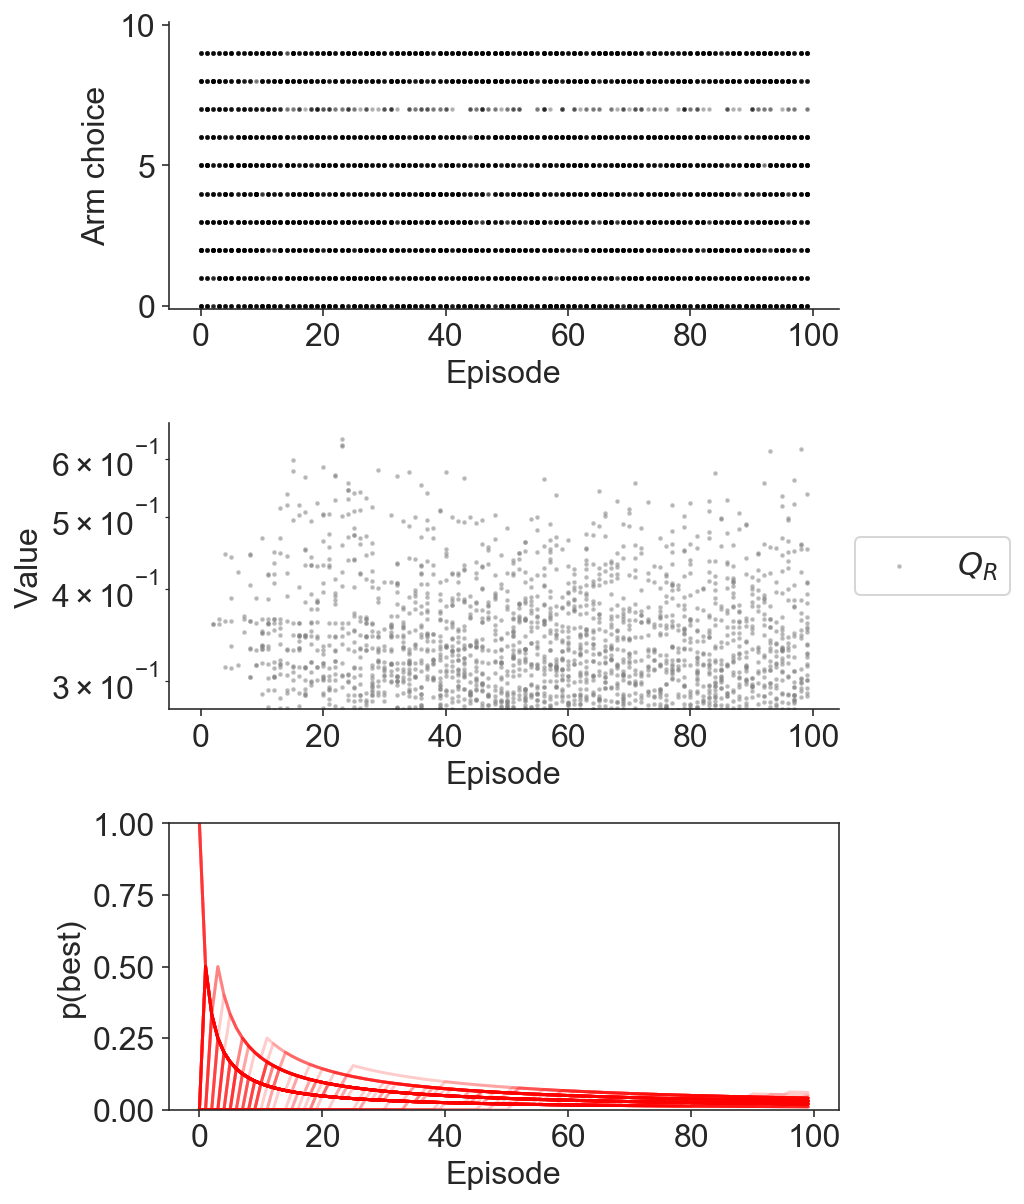

In [16]:
plot_beta_results(env_name, results)

# Distributions

In [9]:
results[0].keys()

dict_keys(['best', 'lr_R', 'beta', 'temp', 'episodes', 'actions', 'p_bests', 'regrets', 'critic', 'total_E', 'total_R', 'scores_E', 'scores_R', 'values_R'])

Text(0, 0.5, 'Count')

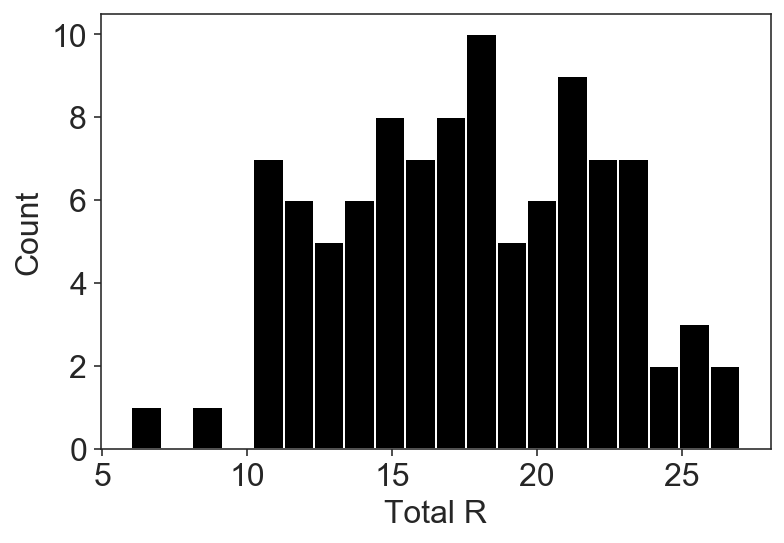

In [10]:
plt.hist([r["total_R"] for r in results], color="black", bins=20)
plt.xlabel("Total R")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

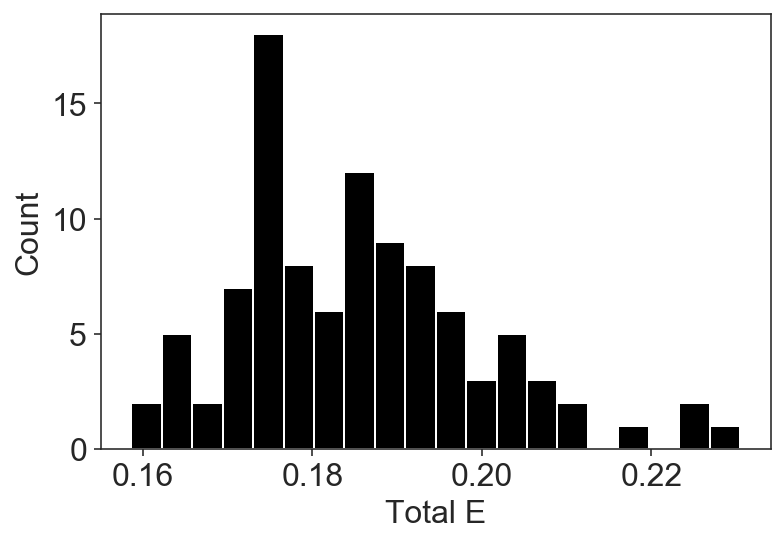

In [11]:
plt.hist([r["total_E"] for r in results], color="black", bins=20)
plt.xlabel("Total E")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

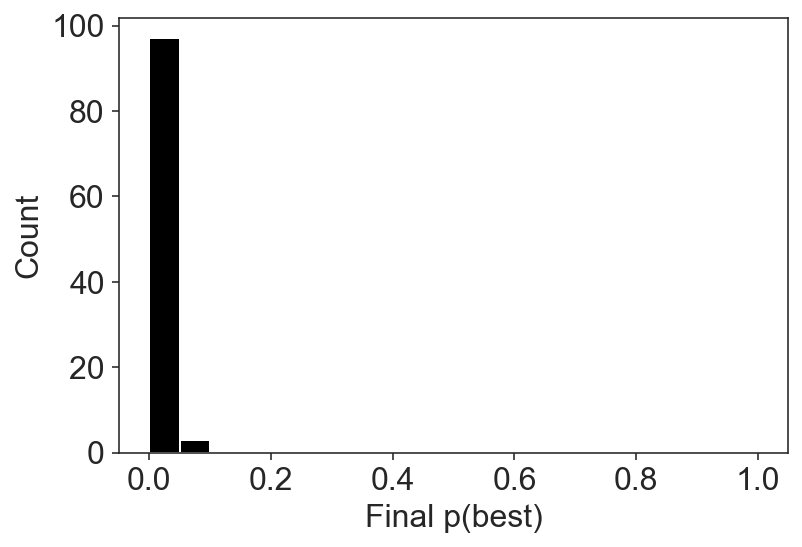

In [12]:
plt.hist([r["p_bests"][-1] for r in results], color="black", bins=20, range=(0, 1))
plt.xlabel("Final p(best)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

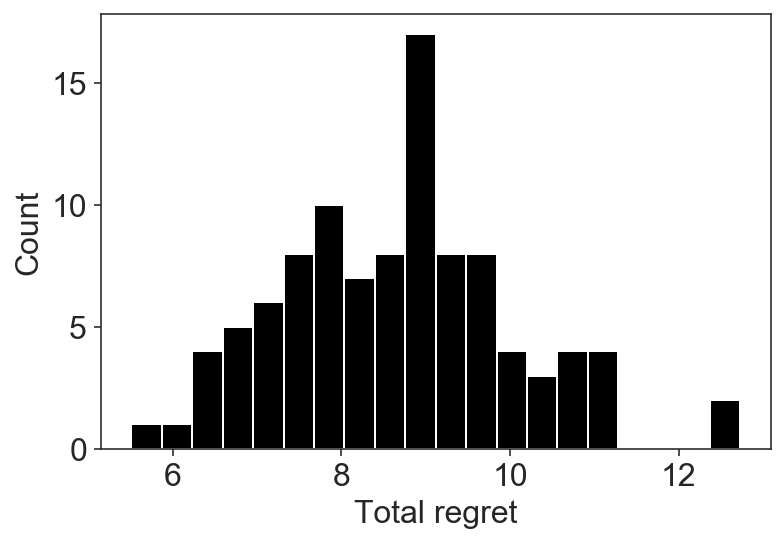

In [13]:
plt.hist([np.sum(r["regrets"]) for r in results], color="black", bins=20)
plt.xlabel("Total regret")
plt.ylabel("Count")